In [15]:
import os
import tarfile
import urllib.request
import pandas as pd


REMOTE_DATA_URL='https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'
SAVE_PATH='data'

def fetch_data(save_path, remote_url):
    if not os.path.isdir(save_path):
        os.makedirs(save_path)
    r = urllib.request.urlopen(remote_url)
    t = tarfile.open(fileobj=r, mode='r:gz')
    t.extractall(save_path)
    return os.path.join(os.getcwd(), save_path, 'housing.csv')

def load_data(path_to_data_file):
    return pd.read_csv(path_to_data_file)

In [19]:
data_file = fetch_data(SAVE_PATH, REMOTE_DATA_URL)
housing_info = load_data(data_file)
housing_info.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
housing_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
housing_info['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [22]:
housing_info.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


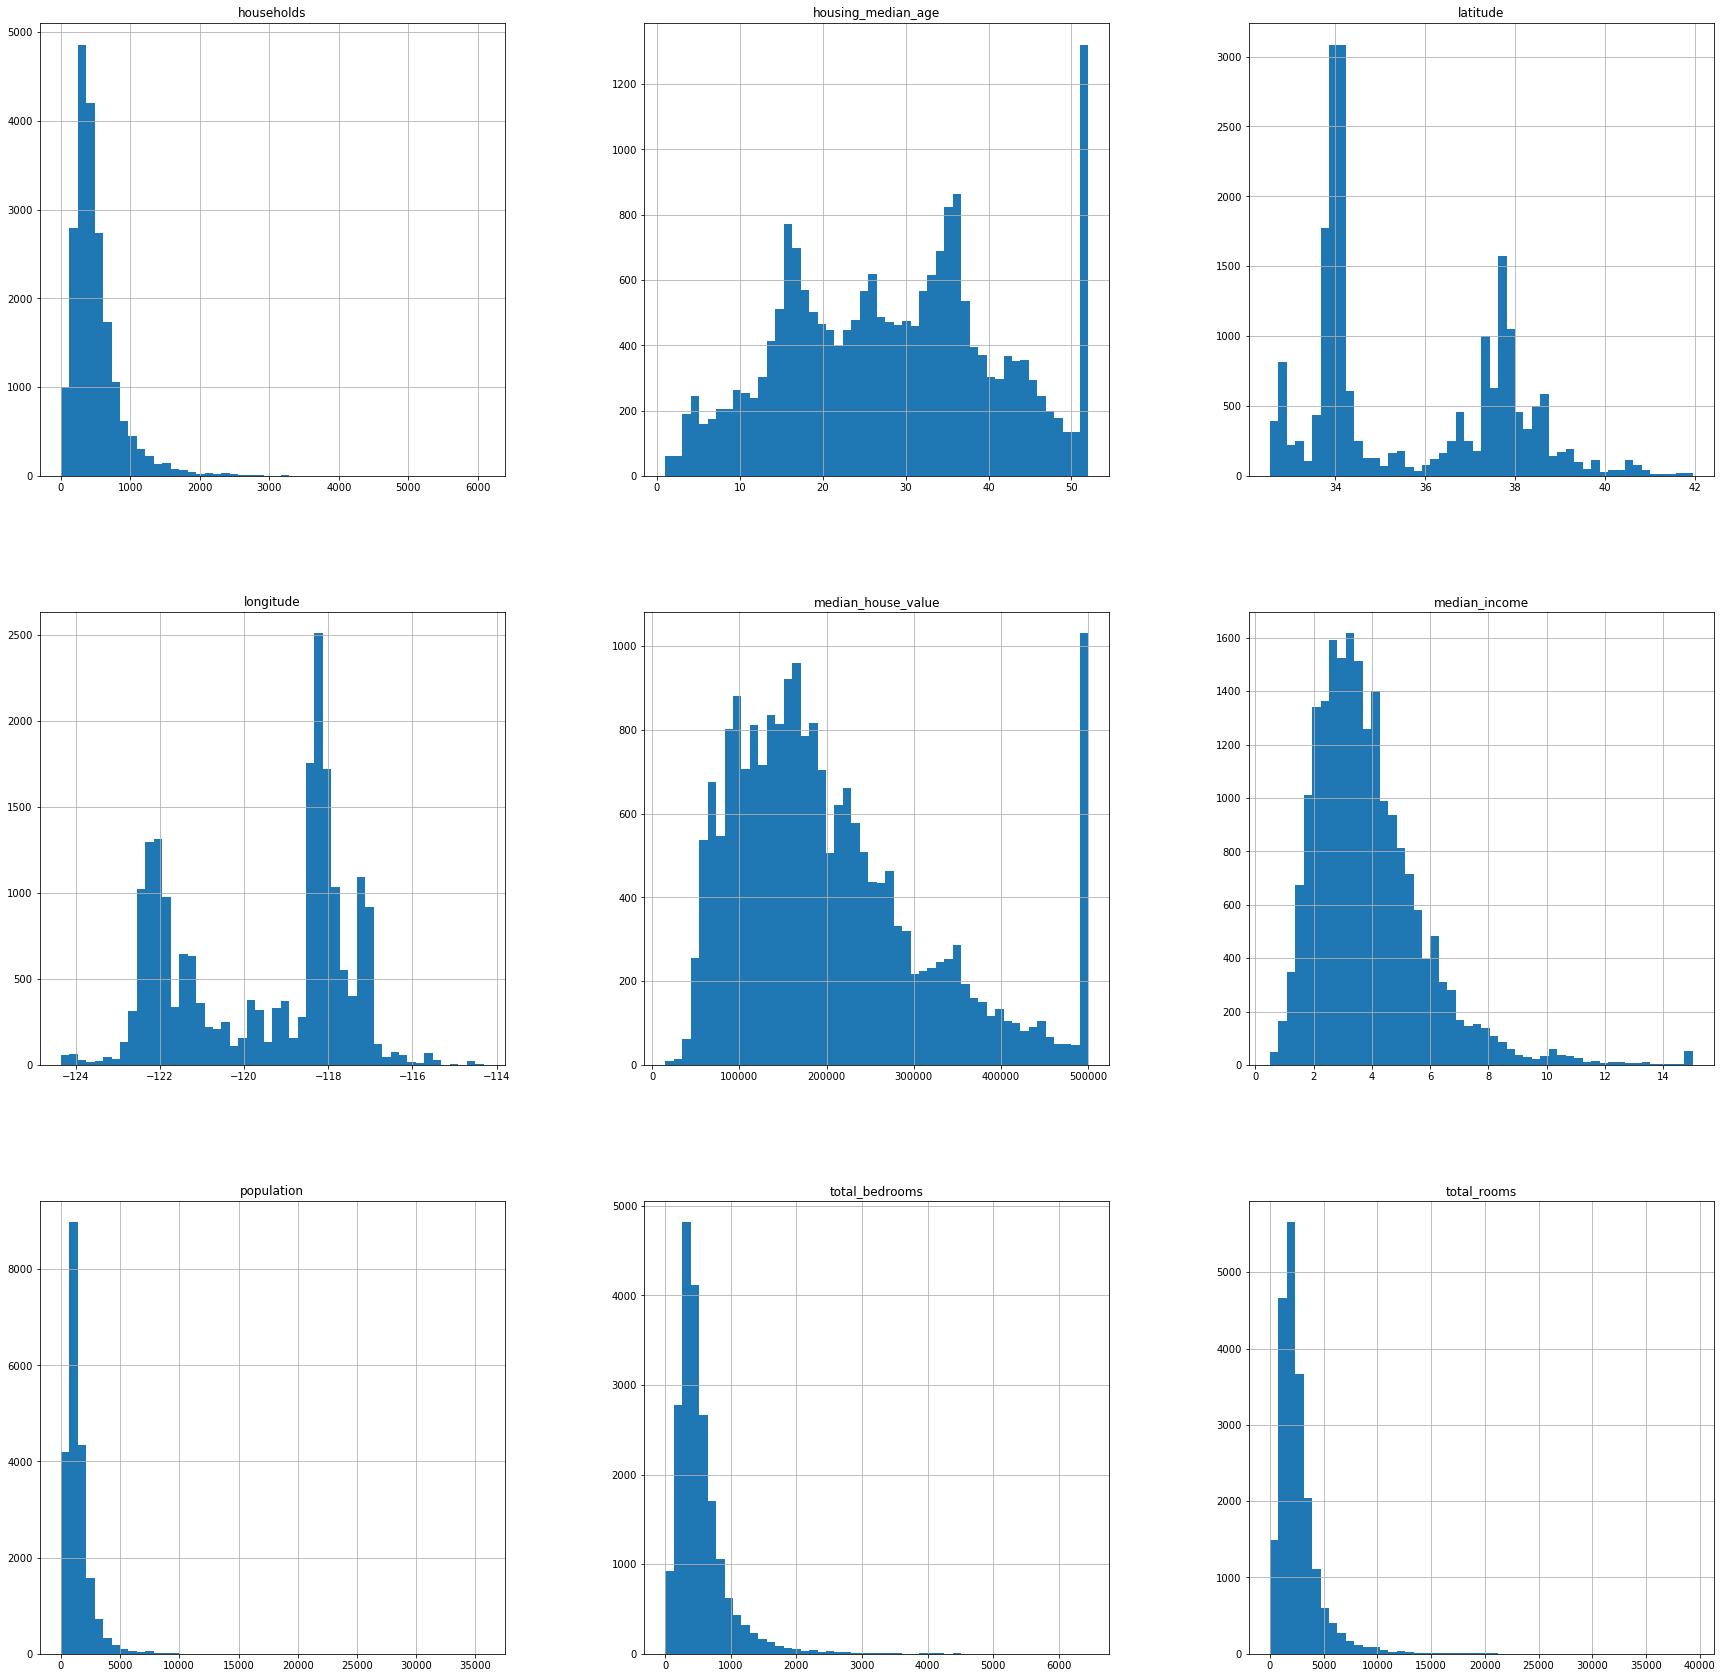

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_info.hist(bins=50, figsize=(30,30))


plt.show()

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

#Make median income easier to analyze, by creating discrete categories
housing_info['income_cat'] = np.ceil(housing_info['median_income'] / 1.5)
housing_info['income_cat'].where(housing_info['income_cat'] < 5, 5.0, inplace=True)

#Create stratified test, train set. This is fundamental because we do not want skewed data in our sets.
#
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
for train_i, test_i in split.split(housing_info, housing_info['income_cat']):
    strait_train_set = housing_info.loc[train_i]
    strait_test_set = housing_info.loc[test_i]

#Now get rid of our helper category used for stratification.
for s in (strait_train_set, strait_test_set):
    s.drop(['income_cat'], axis=1, inplace=True)


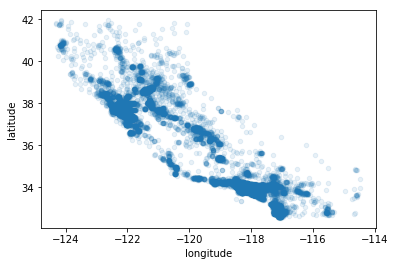

In [43]:
#Let's look at the data more in-depth, by aliasing the training data and forgetting about the test data set
hd = strait_train_set.copy()
hd.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

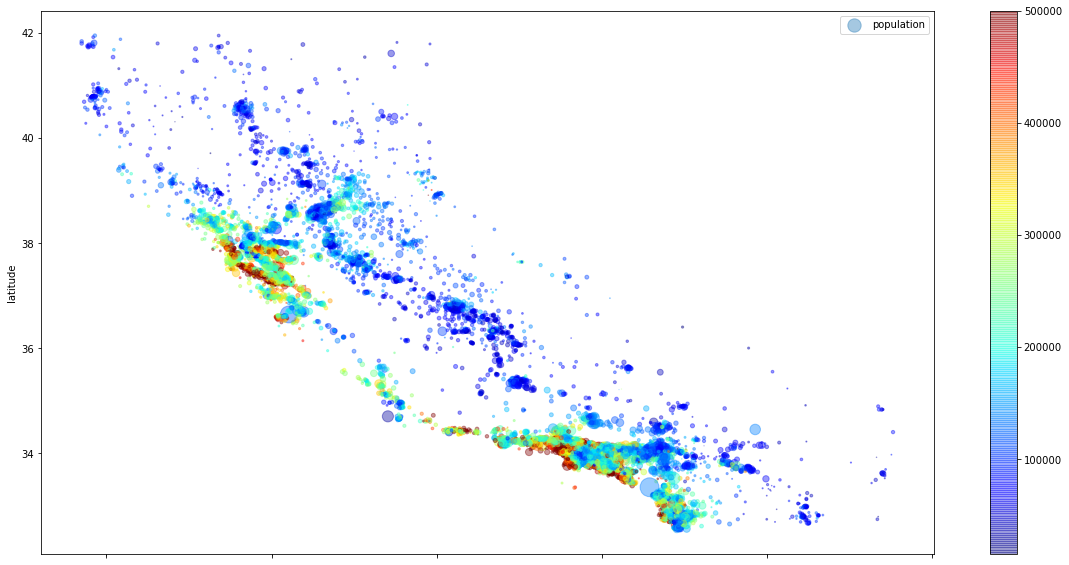

In [51]:
#Let's tweak the color to understand the data
hd.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=hd['population']/100, 
        label='population', c=hd["median_house_value"], cmap=plt.get_cmap('jet'), colorbar=True, figsize=(20,10))
plt.legend()
